In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
data=pd.read_excel("/content/employee_burnout_analysis-AI 2.xlsx")

In [3]:
data

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52


In [4]:
#null values
data.isnull(  ).sum(  )

,0
Employee ID,0
Date of Joining,0
Gender,0
Company Type,0
WFH Setup Available,0
Designation,0
Resource Allocation,1381
Mental Fatigue Score,2117
Burn Rate,1124


In [5]:
data.isnull().sum().values.sum()

4622

In [6]:
#to know how many rows and columns
data.shape

(22750, 9)

In [7]:
#data information
data.describe()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


In [8]:
data.nunique()

,0
Employee ID,22750
Date of Joining,366
Gender,2
Company Type,2
WFH Setup Available,2
Designation,6
Resource Allocation,10
Mental Fatigue Score,101
Burn Rate,101


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


checking the columns

In [10]:

data.columns.tolist()

['Employee ID',
 'Date of Joining',
 'Gender',
 'Company Type',
 'WFH Setup Available',
 'Designation',
 'Resource Allocation',
 'Mental Fatigue Score',
 'Burn Rate']

comparing the relation with the burn rate of numeric values

In [11]:
data.corr(numeric_only=True)['Burn Rate'][:-1]

,Burn Rate
Designation,0.737556
Resource Allocation,0.856278
Mental Fatigue Score,0.944546


In [12]:
#deleting null values
data=data.dropna()

In [13]:
data.shape

(18590, 9)

In [18]:
data=data.drop(['Employee ID'],axis=1)

the date format is in the time so for the numeric values convertings to days

Min date2008-01-01 00:00:00
Max date2008-12-31 00:00:00


<Axes: xlabel='month', ylabel='employee'>

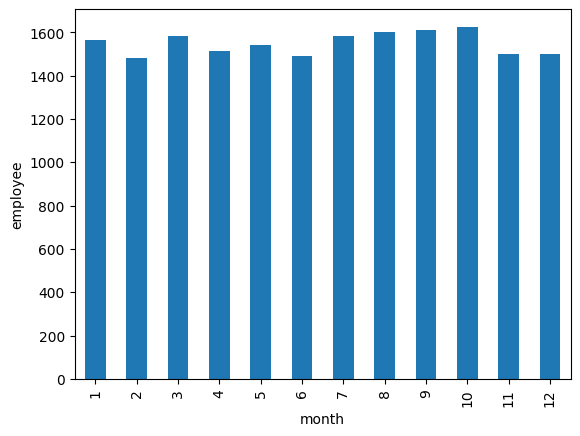

In [19]:
print(f"Min date{data['Date of Joining'].min()}")
print(f"Max date{data['Date of Joining'].max()}")
data_month=data.copy()
data_month['Date of Joining']=data_month["Date of Joining"].astype("datetime64[ns]")
data_month['Date of Joining'].groupby(data_month["Date of Joining"].dt.month).count().plot(kind="bar",xlabel='month',ylabel='employee')

In [23]:
data_2008=pd.to_datetime(["2008-01-01"]*len(data))
data["Days"]=data['Date of Joining'].astype("datetime64[ns]").sub(data_2008).dt.days
data.Days

,Days
0,273
1,334
3,307
4,205
5,330
...,...
22743,349
22744,147
22746,18
22748,9


In [24]:
numeric_data=data.select_dtypes(include=['number'])
correlation=numeric_data.corr()['Burn Rate']
print(correlation)

Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Burn Rate               1.000000
Days                    0.000309
Name: Burn Rate, dtype: float64


In [25]:
data.corr(numeric_only=True)['Burn Rate'][:-1]

,Burn Rate
Designation,0.736412
Resource Allocation,0.855005
Mental Fatigue Score,0.944389
Burn Rate,1.000000


so these doesnt impact the dependent burn rate

In [26]:
data=data.drop(['Date of Joining','Days'],axis=1)

In [27]:
data

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,Female,Service,No,2,3.0,3.8,0.16
1,Male,Service,Yes,1,2.0,5.0,0.36
3,Male,Service,Yes,1,1.0,2.6,0.20
4,Female,Service,No,3,7.0,6.9,0.52
5,Male,Product,Yes,2,4.0,3.6,0.29
...,...,...,...,...,...,...,...
22743,Female,Product,Yes,1,3.0,6.0,0.48
22744,Male,Product,No,3,7.0,6.2,0.54
22746,Female,Product,Yes,3,6.0,6.7,0.59
22748,Female,Service,No,2,5.0,5.9,0.52


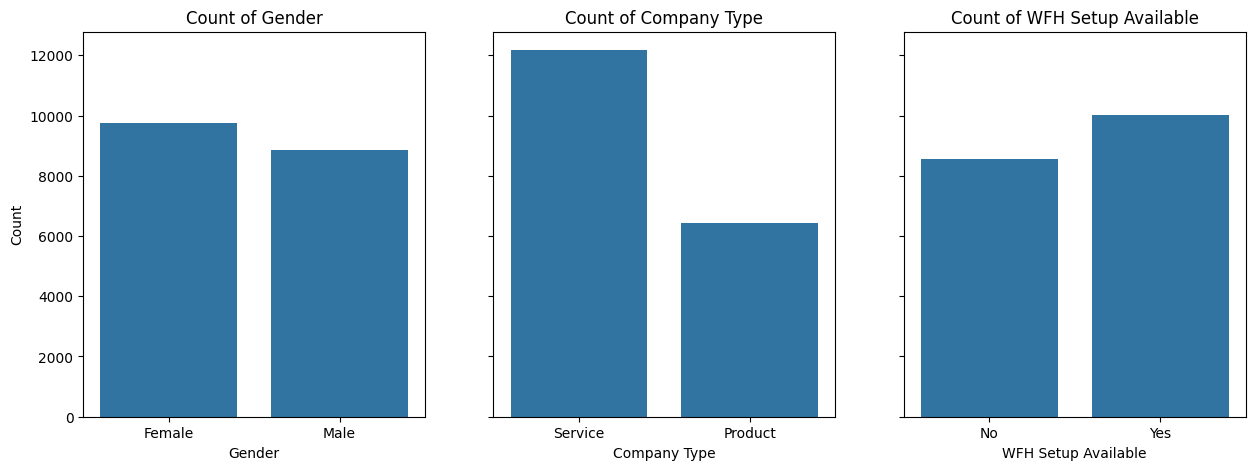

In [31]:


# Select categorical columns
cat_columns = data.select_dtypes(include='object').columns

# Create subplots
fig, ax = plt.subplots(nrows=1, ncols=len(cat_columns), sharey=True, figsize=(15, 5))

# Loop through each categorical column
for i, c in enumerate(cat_columns):
    sns.countplot(x=c, data=data, ax=ax[i])
    ax[i].set_title(f'Count of {c}')
    ax[i].set_xlabel(c)
    ax[i].set_ylabel('Count')

# Show the plot
plt.show()


one hot encoding for categorical data
to change string to numeric

In [33]:
#one hot encoding
if all(col in data.columns for col in ['Company Type','WFH Setup Available','Gender']):
  data=pd.get_dummies(data,columns=['Company Type','WFH Setup Available','Gender'],drop_first=True)
  encoded_columns=data.columns
else:
  print("columns not found")
  print(data.columns)

In [34]:
data

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Company Type_Service,WFH Setup Available_Yes,Gender_Male
0,2,3.0,3.8,0.16,True,False,False
1,1,2.0,5.0,0.36,True,True,True
3,1,1.0,2.6,0.20,True,True,True
4,3,7.0,6.9,0.52,True,False,False
5,2,4.0,3.6,0.29,False,True,True
...,...,...,...,...,...,...,...
22743,1,3.0,6.0,0.48,False,True,False
22744,3,7.0,6.2,0.54,False,False,True
22746,3,6.0,6.7,0.59,False,True,False
22748,2,5.0,5.9,0.52,True,False,False


Preprocessing
spliting the data into 4 parts into x y
xtest xtrain ytest ytrain

In [36]:
from os import X_OK
y=data['Burn Rate']
X=data.drop(['Burn Rate'],axis=1)

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,shuffle=True,random_state=1)

scaler=StandardScaler()
scaler.fit(X_train)
X_train=pd.DataFrame(scaler.transform(X_train),index=X_train.index,columns=X_train.columns)
X_test=pd.DataFrame(scaler.transform(X_test),index=X_test.index,columns=X_test.columns)

In [38]:
X_train

,Designation,Resource Allocation,Mental Fatigue Score,Company Type_Service,WFH Setup Available_Yes,Gender_Male
8977,0.723327,0.250185,-0.061773,0.724706,-1.082297,1.051505
14115,-0.159330,0.250185,-0.941481,0.724706,-1.082297,-0.951018
8797,0.723327,0.250185,0.973179,0.724706,-1.082297,-0.951018
1173,-1.041987,-1.214568,-0.579248,-1.379869,-1.082297,-0.951018
1941,-0.159330,0.738436,1.180169,-1.379869,0.923961,1.051505
...,...,...,...,...,...,...
13453,0.723327,1.226687,1.645897,-1.379869,0.923961,-0.951018
21179,0.723327,0.250185,-1.044976,0.724706,0.923961,1.051505
6327,0.723327,0.250185,0.093470,0.724706,-1.082297,1.051505
14933,-0.159330,0.250185,0.714441,0.724706,-1.082297,1.051505


Linear Regression

In [39]:
#create class and object
lr=LinearRegression()

lr.fit(X_train,y_train)

print("Linear Regression")
#prediction
y_pred=lr.predict(X_test)
#calculate mean square error
mse=mean_squared_error(y_test,y_pred)
print("Mean square error:",mse)
#calculate root mean square error
rms=mean_squared_error(y_test,y_pred,squared=False)
print("root Mean square error:",rms)
#calculate mean absolute error
mae=mean_absolute_error(y_test,y_pred)
print("Mean absolute error:",mae)
#calculate R-squared error
r2=r2_score(y_test,y_pred)
print("R-squared error:",r2)

Linear Regression
Mean square error: 0.0031569779113610717
root Mean square error: 0.0561869905882231
Mean absolute error: 0.04595032032644773
R-squared error: 0.918822674247248


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
